In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm
from matplotlib import colors
from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import matplotlib as mpl

from highlight_text import fig_text

from config import *

import warnings
warnings.filterwarnings("ignore")

blackTheme

{'figBackColor': '#131313',
 'axBackColor': '#131313',
 'textColor': '#ededed',
 'homeColor': '#B94B5F',
 'awayColor': '#4A5EB8'}

In [2]:
teamId = 65
teamName = 'barcelona'
season = input("season: ....?")
gw = input("gameweek: ....?")
venue = int(input("venue:....?"))
venue = "home" if venue==0 else "away"

season: ....? 2122
gameweek: ....? 16
venue:....? 0


In [3]:
import pickle
with open(file=f'/work/assets/whoscored/barcelona/ids/{season}/{season}#{gw}.json', mode="rb") as jfile:
    team_players_dict = pickle.load(jfile)
team_players_dict[venue]

{(381674, 'Sergio Herrera'): 'GK',
 (335790, 'Nacho Vidal'): 'DR',
 (131037, 'Unai García'): 'DC',
 (240874, 'David García'): 'DC',
 (96566, 'Juan Cruz'): 'DL',
 (249960, 'Lucas Torró'): 'DMC',
 (336251, 'Kike Barja'): 'MR',
 (381673, 'Jon Moncayola'): 'MC',
 (119189, 'Rubén García'): 'MC',
 (374813, 'Manu Sánchez'): 'ML',
 (79840, 'Kike García'): 'FW',
 (303707, 'Chimy Avila'): 'Sub',
 (98126, 'Ante Budimir'): 'Sub',
 (84880, 'Darko Brasanac'): 'Sub',
 (109349, 'Roberto Torres'): 'Sub',
 (70216, 'Cote'): 'Sub',
 (300365, 'Javier Ontiveros'): 'Sub',
 (25932, 'Oier Sanjurjo'): 'Sub',
 (82279, 'Iñigo Pérez'): 'Sub',
 (82968, 'Jonás Ramalho'): 'Sub',
 (401183, 'Jaume Grau'): 'Sub',
 (427134, 'Darío Ramos'): 'Sub',
 (391040, 'Javi Martínez'): 'Sub'}

In [6]:
#Loading Some Fonts
smooch = "https://github.com/googlefonts/smooch/blob/master/fonts/ttf/Smooch-Regular.ttf?raw=true"
spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
spaceMono_dance = "https://github.com/googlefonts/moondance/tree/master/fonts/ttf?raw=true"
robot_bold = ("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true")
abel_regular = 'https://github.com/google/fonts/blob/main/ofl/abel/Abel-Regular.ttf?raw=true'

# smoochFont = FontManager(smooch)
monoIFont = FontManager(spaceMono_italy)
monoBFont = FontManager(spaceMono_bold)
monoDFont = FontManager(spaceMono_dance)
robot_bold = FontManager(robot_bold)
abel_regular = FontManager(abel_regular)

In [4]:
def plotScatterMap(df,playerId,ax,time=None):
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]
        
    x = pdf['x']
    y = pdf['y']
    endX = pdf['endX']
    endY = pdf['endY']

    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
    color = cmap(pdf["xT"]/pdf["xT"].max())
    # ax.scatter(y,x,color="#dc2f02",s=100)  
    # ax.scatter(y,x,color="#ffba08",s=150,alpha=.3)   
    ax.scatter(y,x,color=color,s=100,zorder=1)  
    ax.scatter(y,x,color=color,s=350,alpha=.3,zorder=1)  
    
    return None

def plotDefensiveLine(df,ax,playerId=None,time=None,color=None):
    if playerId is not None:
        df = df[df["playerId"]==playerId]
    elif time is not None:
        if isinstance(time,tuple):
            if len(time)==2:
                if time[0] < time[1]:
                    early = time[0]
                    later = time[1]
                else:
                    early = time[1]
                    later = time[0]
                    
                df = df[(df["minute"]>=early)&(df["minute"]<=later)]               
            else:
                raise Exception
        else:        
            df = df[df["minute"]<=time]
        
#     df = df[(df['satisfiedEventsTypes'].apply(str).str.contains('141')) 
#            |(df['satisfiedEventsTypes'].apply(str).str.contains('142'))
#            |(df['satisfiedEventsTypes'].apply(str).str.contains('100'))
#            |(df['satisfiedEventsTypes'].apply(str).str.contains('57'))
#            |(df['satisfiedEventsTypes'].apply(str).str.contains('55')) 
#            |(df['satisfiedEventsTypes'].apply(str).str.contains('59'))
#            |(df['satisfiedEventsTypes'].apply(str).str.contains('94'))]
#     print(len(df))
    
    df = df[(df['type.value']==7)|
           (df['type.value']==8)|
#            (df['type.value']==12)|
           (df['type.value']==56)]
    
    df1st = df[df['period.value']==1]
    df2nd = df[df['period.value']==2]
#     print(len(df))
#     print(len(df1st))
#     print(len(df2nd))
    
    text_color = '#DEB887'
        
    averageX = df["x"].median()
    averageY = df["y"].median()
    averageX1 = df1st["x"].median()
    averageY1 = df1st["y"].median()
    averageX2 = df2nd["x"].median()
    averageY2 = df2nd["y"].median()
    
    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
    color = cmap(averageX/df["x"].max())
    x = np.arange(0, 81, 0.1)  # x座標を-10 から 10 まで 0.1 きざみで取得
    for ave in [averageX,averageX1,averageX2]:
        y = np.sin(x) + ave  # 正弦関数の式を記述
        ax.plot(x, y, linestyle='-',linewidth=2, color=text_color, zorder=10)

#     print(averageX,averageX1,averageX2)
#     print("##################################")
#     print(len(df),len(df1st),len(df2nd))
#     print("##################################")
    
        
    arrow_dict = dict(arrowstyle = "-|>",
                  connectionstyle = "angle3", 
                  color = text_color)
    
    if averageX1 > averageX2:
        ax.annotate("  " + "1st half",
                       xy=(10, averageX1), size=10, fontweight="bold", xytext=(22, averageX1+20),
                       color=text_color, arrowprops = arrow_dict, zorder=20)

        ax.annotate("  " + "2nd half",
                       xy=(10, averageX2), size=10, fontweight="bold", xytext=(22, averageX2-20),
                       color=text_color, arrowprops=arrow_dict, zorder=20)
    elif averageX1 <= averageX2:
        ax.annotate("  " + "1st half",
                       xy=(10, averageX1), size=10, fontweight="bold", xytext=(22, averageX1-20),
                       color=text_color, arrowprops = arrow_dict, zorder=20)

        ax.annotate("  " + "2nd half",
                       xy=(10, averageX2), size=10, fontweight="bold", xytext=(22, averageX2+20),
                       color=text_color, arrowprops=arrow_dict, zorder=20)
    
    
    
    def_third = 40
    att_third = 80
    
    num_def_actions = len(df)
    def_third_actions_percentage = (len(df[df['x'] < def_third]) / num_def_actions) * 100
    mid_third_actions_percentage = (len(df[df['x'].between(def_third, att_third)]) / num_def_actions) * 100
    att_third_actions_percentage = (len(df[df['x'] > att_third]) / num_def_actions) * 100
    #concat to list
    def_actions_list = list([def_third_actions_percentage, mid_third_actions_percentage, att_third_actions_percentage])
    labels = list([f'{int(def_third_actions_percentage)}%', f'{int(mid_third_actions_percentage)}%', f'{int(att_third_actions_percentage)}%'])

    COLORS = {'att': "red","mid": "#23DF94", 'def': "dodgerblue"}

    labels_int = [int(num.replace('%', '')) for num in labels]
    
    path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
    team = "home"
    
    y_pos = [40, 80, 120]
    ax.bar(40, y_pos[0], width=80, 
        align='center', color=[COLORS["def"]], alpha=labels_int[0]*0.01, linewidth=4, zorder=5)
    ax.bar(40, y_pos[0], width=80, bottom=y_pos[0],
        align='center', color=[COLORS["mid"]], alpha=labels_int[1]*0.01, linewidth=4, zorder=5)
    ax.bar(40, y_pos[0], width=80, bottom=y_pos[1],
        align='center', color=[COLORS["att"]], alpha=labels_int[2]*0.01, linewidth=4, zorder=5)

    ax.text(s=labels[0], x=40, y=y_pos[0]-20, 
            color='w', fontsize=12, fontweight='semibold', ha='center', zorder=15, path_effects=path_eff, alpha=1)
    ax.text(s=labels[1], x=40, y=y_pos[1]-20, 
            color='w', fontsize=12, fontweight='semibold', ha='center', zorder=15, path_effects=path_eff, alpha=1)
    ax.text(s=labels[2], x=40, y=y_pos[2]-20, 
            color="w", fontsize=12, fontweight='semibold', ha='center', zorder=15, path_effects=path_eff, alpha=1)
    
    opp = df["opponent"].iloc[0]
    ax.set_title(opp,color="gray",fontweight='bold')
    

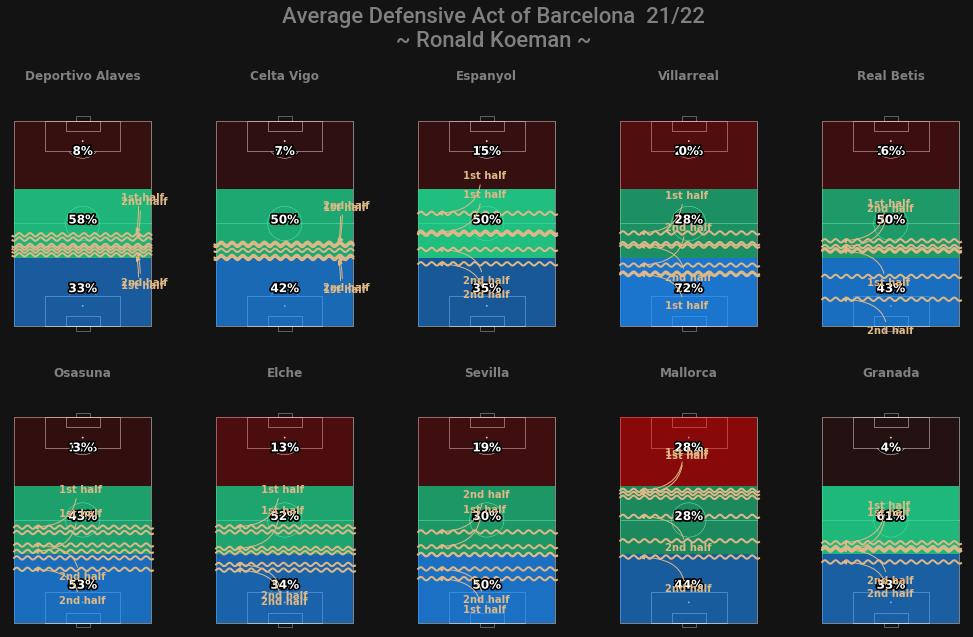

In [7]:
fig,axes = plt.subplots(2,5,figsize=(17.5,10))
fig.set_facecolor("#131313")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)

axes = axes.ravel()

for i in range(len(axes)):
    pitch.draw(ax=axes[i])

myFont = robot_bold
# fig.text(  
#     0.375, 0.845, "Unsuccessful                                           Successful", size=16,
#     fontproperties=myFont.prop, color="white"
# )

# axes[0].text(  
#     48.165, 130.26, "  Normal Pass                                           Good Pass", size=16,
#     fontproperties=myFont.prop, color="white"
# )
# axes[1].text(  
#     48.165, 130.26, "  Great Pass", size=16,
#     fontproperties=myFont.prop, color="white"
# )


fig.suptitle(t="Average Defensive Act of Barcelona  21/22 \n~ Ronald Koeman ~ ",
             x=.52,y=.99,
             color="gray",
             fontsize=22,
             fontproperties=myFont.prop)

axes[0].invert_xaxis()
axes[1].invert_xaxis()

dfKoeman = []
for i in range(1,11):
    df = pd.read_csv(f'/work/assets/whoscored/barcelona/match/2122/eventsData/2122#{i}.csv')
    df = df[df["teamId"]==65]
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    dfKoeman.append(df)
    d
    plotDefensiveLine(df=df,ax=axes[i-1],time=(0,90))
    
print("====================")
dfXavi = []
for i in range(11,21):
    df = pd.read_csv(f'/work/assets/whoscored/barcelona/match/2122/eventsData/2122#{i}.csv')
    df = df[df["teamId"]==65]
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    dfXavi.append(df)
    
    plotDefensiveLine(df=df,ax=axes[i-11],time=(0,90))
    
# plt.savefig(f'/work/output/Def_Koeman.png', bbox_inches='tight', transparent=True, dpi=300, facecolor='#131313')


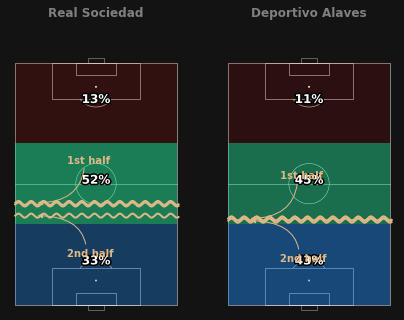

In [11]:
fig,ax = plt.subplots(1,2,figsize=(7,6))
fig.set_facecolor("#131313")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)
pitch.draw(ax = ax[0])
pitch.draw(ax = ax[1])


plotDefensiveLine(df=pd.concat(dfKoeman),ax=ax[0],time=(0,60))
plotDefensiveLine(df=pd.concat(dfXavi),ax=ax[1],time=(0,60))

In [12]:
def setup(df):
    xGFor = df["xG"]
    xGAgainst = df["xGA"]
    return xGFor,xGAgainst

In [13]:
path = "/work/assets/fbref/teamStats/barcelona/fixture2122.csv"
df = pd.read_csv(path)
df = df[df["Comp"]=="La Liga"]
df.reset_index(inplace=True,drop=True)
a,b = setup(df)


In [14]:
df = pd.DataFrame([a,b]).T
df = df.dropna()
sm = df.sum(axis=1)
import math
xGPer = df["xG"]/sm * 100
xGAPer = df["xGA"]/sm * 100

In [15]:
print(len(xGAPer))
print(len(xGPer))

20
20


Text(13, 3.7, 'Start of Xavi-Barca')

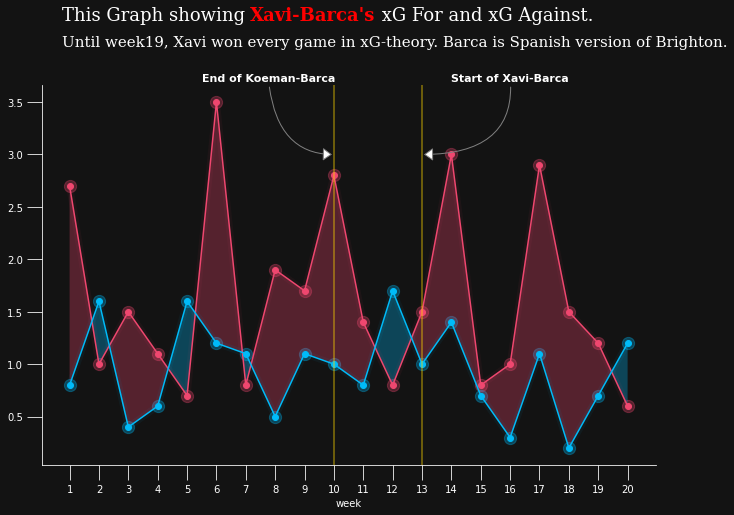

In [113]:
fig,ax = plt.subplots(figsize = (11,7))

fig.set_facecolor("#131313")
ax.set_facecolor("#131313")

xGPer = df["xG"]
xGAPer = df["xGA"]


ax.scatter(range(len(xGPer)), xGPer, color="#ef476f",alpha=.3,s=150)
ax.scatter(range(len(xGAPer)), xGAPer, color="#00bbf9",alpha=.3,s=150)

ax.plot(np.array(range(len(xGPer))), xGPer, marker="o", label="2017/18", color="#ef476f", alpha=1)
ax.plot(np.array(range(len(xGPer))), xGPer, marker="o", label="2017/18", color="#ef476f", alpha=.05, lw=7)

ax.plot(np.array(range(len(xGAPer))), xGAPer, marker="o", label="2018/19", color="#00bbf9", alpha=1)
ax.plot(np.array(range(len(xGAPer))), xGAPer, marker="o", label="2018/19", color="#00bbf9", alpha=.05, lw=7)

ax.fill_between(x=range(len(xGPer)),y1=xGPer,y2=xGAPer, 
                where=xGPer>xGAPer,
                facecolor="#ef476f", 
                interpolate=True,
                linestyle="-.", alpha=.3)

ax.fill_between(x=range(len(xGPer)),y1=xGPer,y2=xGAPer, 
                where=xGPer<xGAPer,
                facecolor="#00bbf9", interpolate=True,
                linestyle="-.", alpha=.3)

ax.tick_params(colors="w", length=15, left=True, bottom=True, labelbottom=True, labelleft=True)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color("w")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

ax.set_xticks(np.arange(0,20)) 
ax.set_xticklabels(np.arange(1,21))
ax.set_xlabel("week",color="w")

fig_text(
    x=.15,y=1.0,
    s=f"This Graph showing <Xavi-Barca's> xG For and xG Against.",
    color="#ffffff",
    fontsize=18,
    highlight_colors=["red"],
    highlight_weights = 'bold',
    fontname='serif'
)
fig_text(
    x=.15,y=.95,
    s="Until week19, Xavi won every game in xG-theory. Barca is Spanish version of Brighton.",
    fontsize=15,
    color='#ffffff',
#     highlight_colors=['#9b5de5','#007200','#fee440','#00bbf9',"#ef476f"],
    highlight_weights = 'bold',
    fontname='serif'
)

ax.axvline(x=9,ymin=0,ymax=4,color="gold",alpha=.5)
ax.axvline(x=12,ymin=0,ymax=4,color="gold",alpha=.5)

ax.annotate(text="End of Koeman-Barca",xytext=(4.5,3.7),xy=(9,3),color="white",
            fontsize=11,fontweight="bold",
            arrowprops={'arrowstyle':"-|>,head_width=.5,head_length=.7",
                        "connectionstyle":"angle3, angleA = 95, angleB = 0",
                                        'fc':'white',
                                        'ec':'gray'})
ax.annotate(text="Start of Xavi-Barca",xytext=(13,3.7),xy=(12,3),color="white",
            fontsize=11,fontweight="bold",
            arrowprops={'arrowstyle':"-|>,head_width=.5,head_length=.7",
                        "connectionstyle":"angle3, angleA = 95, angleB = 0",
                                        'fc':'white',
                                        'ec':'gray'})

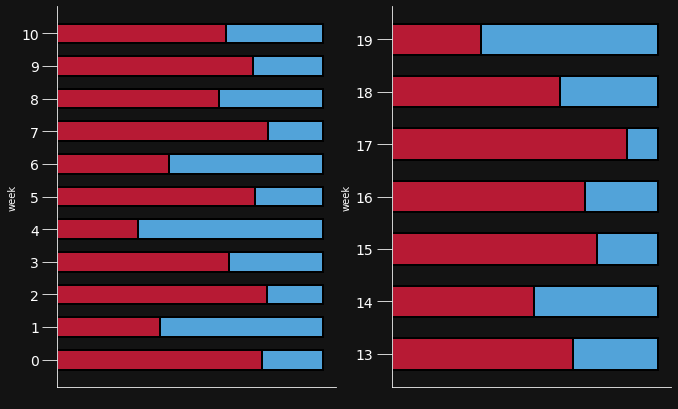

In [510]:
fig,ax = plt.subplots(1,2,figsize = (11,7))

fig.set_facecolor("#131313")

def plotBar(ax,xGPer,xGAPer): 
    ax.set_facecolor("#131313")
    ax.set_zorder(1)

    ax.tick_params(colors="w", length=15, left=True, bottom=True, labelbottom=True, labelleft=True)
    ax.set_ylabel("week",color="w")
    ax.set_yticks(np.arange(0,22)) 
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
    # ax.set_ylabel("psxG-GA( rolling mean )",color="w")

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color("w")
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("w")

    xG = ax.barh(xGPer.index, xGPer, height=0.6,
                           alpha=1, facecolor="#B71A34", edgecolor='k', linewidth=2)
    xGA = ax.barh(xGAPer.index, xGAPer, height=0.6,
                           alpha=1, facecolor="#52A3D9", edgecolor='k', linewidth=2,
                           left=xGPer)
    
#     ax.set_frame_on(False
    ax.axes.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', colors='w', labelsize=14)
plotBar(ax[0],xGPer[:11],xGAPer[:11])
plotBar(ax[1],xGPer[13:],xGAPer[13:])

In [463]:
np.arange(1,11).tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [150]:
df = df[(df['satisfiedEventsTypes'].apply(str).str.contains('141')) 
           |(df['satisfiedEventsTypes'].apply(str).str.contains('142'))
           |(df['satisfiedEventsTypes'].apply(str).str.contains('100'))
           |(df['satisfiedEventsTypes'].apply(str).str.contains('57'))
           |(df['satisfiedEventsTypes'].apply(str).str.contains('55')) 
           |(df['satisfiedEventsTypes'].apply(str).str.contains('59'))
           |(df['satisfiedEventsTypes'].apply(str).str.contains('94'))]

In [87]:
df["satisfiedEventsTypes"]

369      [90, 93, 94, 56, 214]
771      [90, 93, 94, 56, 214]
997      [90, 93, 94, 56, 214]
1001    [90, 93, 94, 205, 214]
1003     [90, 93, 94, 56, 215]
1463     [90, 93, 94, 56, 214]
1582     [90, 93, 94, 56, 214]
Name: satisfiedEventsTypes, dtype: object

In [96]:
df["type.displayName"].unique()

array(['Start', 'BallRecovery', 'Pass', 'Foul', 'TakeOn', 'BallTouch',
       'SavedShot', 'Aerial', 'Interception', 'BlockedPass',
       'OffsideProvoked', 'Tackle', 'MissedShots', 'OffsideGiven',
       'Dispossessed', 'OffsidePass', 'Challenge', 'CornerAwarded',
       'Clearance', 'KeeperPickup', 'Error', 'Save', 'End',
       'SubstitutionOff', 'SubstitutionOn', 'Goal', 'Punch', 'Card',
       'FormationSet'], dtype=object)

In [8]:
def load_EPV_grid(fname='EPV_grid.csv'):
    """ load_EPV_grid(fname='EPV_grid.csv')
    
    # load pregenerated EPV surface from file. 
    
    Parameters
    -----------
        fname: filename & path of EPV grid (default is 'EPV_grid.csv' in the curernt directory)
        
    Returns
    -----------
        EPV: The EPV surface (default is a (32,50) grid)
    
    """
    epv = np.loadtxt(fname, delimiter=',')
    return epv

def get_EPV_at_location(position,EPV,attack_direction,field_dimen=(106.,68.)):
    """ get_EPV_at_location
    
    Returns the EPV value at a given (x,y) location
    
    Parameters
    -----------
        position: Tuple containing the (x,y) pitch position
        EPV: tuple Expected Possession value grid (loaded using load_EPV_grid() )
        attack_direction: Sets the attack direction (1: left->right, -1: right->left)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
            
    Returrns
    -----------
        EPV value at input position
        
    """
    
    x,y = position
    if abs(x)>field_dimen[0]/2. or abs(y)>field_dimen[1]/2.:
        return 0.0 # Position is off the field, EPV is zero
    else:
        if attack_direction==-1:
            EPV = np.fliplr(EPV)
        ny,nx = EPV.shape
        dx = field_dimen[0]/float(nx)
        dy = field_dimen[1]/float(ny)
        ix = (x+field_dimen[0]/2.-0.0001)/dx
        iy = (y+field_dimen[1]/2.-0.0001)/dy
        return EPV[int(iy),int(ix)]
    
def calculate_epv_added( event_id, events, tracking_home, tracking_away, GK_numbers, EPV, params):
    """ calculate_epv_added
    
    Calculates the expected possession value added by a pass
    
    Parameters
    -----------
        event_id: Index (not row) of the pass event to calculate EPV-added score
        events: Dataframe containing the event data
        tracking_home: tracking DataFrame for the Home team
        tracking_away: tracking DataFrame for the Away team
        GK_numbers: tuple containing the player id of the goalkeepers for the (home team, away team)
        EPV: tuple Expected Possession value grid (loaded using load_EPV_grid() )
        params: Dictionary of pitch control model parameters (default model parameters can be generated using default_model_params() )
        
    Returrns
    -----------
        EEPV_added: Expected EPV value-added of pass defined by event_id
        EPV_difference: The raw change in EPV (ignoring pitch control) between end and start points of pass

    """
    # pull out pass details from the event data
    pass_start_pos = np.array([events.loc[event_id]['Start X'],events.loc[event_id]['Start Y']])
    pass_target_pos = np.array([events.loc[event_id]['End X'],events.loc[event_id]['End Y']])
    pass_frame = events.loc[event_id]['Start Frame']
    pass_team = events.loc[event_id].Team
    
    # direction of play for atacking team (so we know whether to flip the EPV grid)
    home_attack_direction = mio.find_playing_direction(tracking_home,'Home')
    if pass_team=='Home':
        attack_direction = home_attack_direction
        attacking_players = mpc.initialise_players(tracking_home.loc[pass_frame],'Home',params,GK_numbers[0])
        defending_players = mpc.initialise_players(tracking_away.loc[pass_frame],'Away',params,GK_numbers[1])
    elif pass_team=='Away':
        attack_direction = home_attack_direction*-1
        defending_players = mpc.initialise_players(tracking_home.loc[pass_frame],'Home',params,GK_numbers[0])
        attacking_players = mpc.initialise_players(tracking_away.loc[pass_frame],'Away',params,GK_numbers[1])    
    # flag any players that are offside
    attacking_players = mpc.check_offsides( attacking_players, defending_players, pass_start_pos, GK_numbers)
    # pitch control grid at pass start location
    Patt_start,_ = mpc.calculate_pitch_control_at_target(pass_start_pos, attacking_players, defending_players, pass_start_pos, params)
    # pitch control grid at pass end location
    Patt_target,_ = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params)
    
    # EPV at start location
    EPV_start = get_EPV_at_location(pass_start_pos, EPV, attack_direction=attack_direction)
    # EPV at end location
    EPV_target   = get_EPV_at_location(pass_target_pos,EPV,attack_direction=attack_direction)
    
    # 'Expected' EPV at target and start location
    EEPV_target = Patt_target*EPV_target
    EEPV_start = Patt_start*EPV_start
    
    # difference is the (expected) EPV added
    EEPV_added = EEPV_target - EEPV_start
    
    # Also calculate the straight up change in EPV
    EPV_difference = EPV_target - EPV_start

    return EEPV_added, EPV_difference

def find_max_value_added_target( event_id, events, tracking_home, tracking_away, GK_numbers, EPV, params ):
    """ find_max_value_added_target
    
    Finds the *maximum* expected possession value that could have been achieved for a pass (defined by the event_id) by searching the entire field for the best target.
    
    Parameters
    -----------
        event_id: Index (not row) of the pass event to calculate EPV-added score
        events: Dataframe containing the event data
        tracking_home: tracking DataFrame for the Home team
        tracking_away: tracking DataFrame for the Away team
        GK_numbers: tuple containing the player id of the goalkeepers for the (home team, away team)
        EPV: tuple Expected Possession value grid (loaded using load_EPV_grid() )
        params: Dictionary of pitch control model parameters (default model parameters can be generated using default_model_params() )
        
    Returrns
    -----------
        maxEPV_added: maximum EPV value-added that could be achieved at the current instant
        max_target_location: (x,y) location of the position of the maxEPV_added

    """
    # pull out pass details from the event data
    pass_start_pos = np.array([events.loc[event_id]['Start X'],events.loc[event_id]['Start Y']])
    pass_frame = events.loc[event_id]['Start Frame']
    pass_team = events.loc[event_id].Team
    
    # direction of play for atacking team (so we know whether to flip the EPV grid)
    home_attack_direction = mio.find_playing_direction(tracking_home,'Home')
    if pass_team=='Home':
        attack_direction = home_attack_direction
        attacking_players = mpc.initialise_players(tracking_home.loc[pass_frame],'Home',params,GK_numbers[0])
        defending_players = mpc.initialise_players(tracking_away.loc[pass_frame],'Away',params,GK_numbers[1])
    elif pass_team=='Away':
        attack_direction = home_attack_direction*-1
        defending_players = mpc.initialise_players(tracking_home.loc[pass_frame],'Home',params,GK_numbers[0])
        attacking_players = mpc.initialise_players(tracking_away.loc[pass_frame],'Away',params,GK_numbers[1])   
        
    # flag any players that are offside
    attacking_players = mpc.check_offsides( attacking_players, defending_players, pass_start_pos, GK_numbers)
    
    # pitch control grid at pass start location
    Patt_start,_ = mpc.calculate_pitch_control_at_target(pass_start_pos, attacking_players, defending_players, pass_start_pos, params)
    
    # EPV at start location
    EPV_start = get_EPV_at_location(pass_start_pos, EPV, attack_direction=attack_direction)

    # calculate pitch control surface at moment of the pass
    PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_id, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
    
    # EPV surface at instance of the pass
    if attack_direction == -1:
        EEPV = np.fliplr(EPV)*PPCF
    else:
        EEPV = EPV*PPCF
        
    # find indices of the maxEPV
    maxEPV_idx = np.unravel_index(EEPV.argmax(),EEPV.shape)
    
    # Expected EPV at current ball position   
    EEPV_start = Patt_start*EPV_start
    
    # maxEPV_added (difference between max location and current ball location)
    maxEPV_added = EEPV.max() - EEPV_start
    
    # location of maximum
    max_target_location = (xgrid[maxEPV_idx[1]], ygrid[maxEPV_idx[0]])

    return maxEPV_added, max_target_location


In [9]:
epv = pd.read_csv("/work/assets/LaurieOnTracking-master/EPV_grid.csv",header=None)
epv = np.array(epv)
epv.shape

(32, 50)

In [15]:
for idx,row in df[["x","y"]].iterrows():
    epvVal = get_EPV_at_location((row[0],row[1]),epv,1)
    passStartPos = np.array([df.loc[idx]["x"],df.loc[idx]["y"]])
    passEndPos = np.array([df.loc[idx]["endX"],df.loc[idx]["endY"]])
    passFrame = df[df["type.displayName"]=="Pass"]
    passTeam = df[df["teamId"]==65]
    
    homeAttDir =

In [17]:
df.loc[0].Team

KeyError: 0